### Analyzing the New York Times comments section

For this assignment, inspect the <a href="https://developer.nytimes.com/">NYT API</a>, specifically their API for article comments. We'll be completing two major tasks:
- find out where people are commenting from 
- get the most common words from a specific comment 

In [5]:
# import requests and json
import requests
import json

# put your custom settings for the API call here
# you MUST provide an API key, offset value, and article URL
# get your api key from here: https://developer.nytimes.com/
api_key = "XgPmyBaJgyiTmSkwxozkGHR73Rdi1zLb"
offset = str(0)
article_url = "https://www.nytimes.com/2020/06/12/opinion/sunday/floyd-protests-white-supremacy.html"
sort = "reader"

# show the API url with all the settings listed out
api_url = "https://api.nytimes.com/svc/community/v3/user-content/url.json?api-key=%s&offset=%s&sort=%s&url=%s" %(api_key, offset, sort, article_url)
print(api_url)

https://api.nytimes.com/svc/community/v3/user-content/url.json?api-key=XgPmyBaJgyiTmSkwxozkGHR73Rdi1zLb&offset=0&sort=reader&url=https://www.nytimes.com/2020/06/12/opinion/sunday/floyd-protests-white-supremacy.html


In [6]:
# calling the API with requests
response = requests.get(api_url)
# creating a variable called data to hold the json formatted result
data = response.json()

In [7]:
# look at all of the data
# it's a lot of nested dictionaries!
print(type(data))
data

<class 'dict'>


{'debug': {'version': 4, 'nyt-com-shim': True},
 'status': 'OK',
 'copyright': 'Copyright (c) 2020 The New York Times Company.  All Rights Reserved.',
 'results': {'callerID': None,
  'api_timestamp': '1606835672',
  'comments': [{'commentID': 107564420,
    'status': 'approved',
    'commentSequence': 107564420,
    'userID': 72595694,
    'userDisplayName': 'JM',
    'userLocation': 'New York',
    'userTitle': 'NULL',
    'userURL': 'NULL',
    'picURL': None,
    'commentTitle': '<br\\//>',
    'commentBody': '"What’s more, as election season begins in earnest, Americans are going to the ballot box as well." Sustaining this momentum will be absolutely essential: Trump and every elected official who supports him, from local dog-catcher to US Senator, must be vanquished at the polls.',
    'createDate': '1591956558',
    'updateDate': '1593964903',
    'approveDate': '1591956558',
    'recommendations': 674,
    'replyCount': 13,
    'replies': [{'commentID': 107566999,
      'status

In [24]:
# isolate just the comments dictionary

comments = data["results"]["comments"]
print(comments)


[{'commentID': 107564420, 'status': 'approved', 'commentSequence': 107564420, 'userID': 72595694, 'userDisplayName': 'JM', 'userLocation': 'New York', 'userTitle': 'NULL', 'userURL': 'NULL', 'picURL': None, 'commentTitle': '<br\\//>', 'commentBody': '"What’s more, as election season begins in earnest, Americans are going to the ballot box as well." Sustaining this momentum will be absolutely essential: Trump and every elected official who supports him, from local dog-catcher to US Senator, must be vanquished at the polls.', 'createDate': '1591956558', 'updateDate': '1593964903', 'approveDate': '1591956558', 'recommendations': 674, 'replyCount': 13, 'replies': [{'commentID': 107566999, 'status': 'approved', 'commentSequence': 107566999, 'userID': 34609658, 'userDisplayName': 'Kristina', 'userLocation': 'DC', 'userTitle': 'NULL', 'userURL': 'NULL', 'picURL': None, 'commentTitle': '<br\\//>', 'commentBody': "@JM \n\nDid you see what happened in Georgia this week?  In Wisconsin?  Yes, voti

In [29]:
# look at just one of the comments

print(comments[0]["commentBody"])

comment = comments[0]["commentBody"]

"What’s more, as election season begins in earnest, Americans are going to the ballot box as well." Sustaining this momentum will be absolutely essential: Trump and every elected official who supports him, from local dog-catcher to US Senator, must be vanquished at the polls.


In [33]:
# lowercase the comment and remove punctuation
# you can use the code we wrote for the lexical richness exercise to do this

comment = comment.lower()

createNew = ""

for c in comment:
    if c.isalnum():
        createNew+=c
    elif c == " ":
        createNew+=c
        
print(createNew)


whats more as election season begins in earnest americans are going to the ballot box as well sustaining this momentum will be absolutely essential trump and every elected official who supports him from local dogcatcher to us senator must be vanquished at the polls


In [37]:
# split text into list
# create a dictionary of word frequencies!
# go through each word in text_data
# if the word isn't in the dictionary, add it as a key AND give it a value of 1
# if the word IS in the dictionary, add 1 to the value

createNew.split()
wordList = createNew.split()
frequency = {}

for word in wordList:
    if word in frequency:
        frequency[word] += 1
    else:
        frequency[word] = 1

print(frequency)

{'whats': 1, 'more': 1, 'as': 2, 'election': 1, 'season': 1, 'begins': 1, 'in': 1, 'earnest': 1, 'americans': 1, 'are': 1, 'going': 1, 'to': 2, 'the': 2, 'ballot': 1, 'box': 1, 'well': 1, 'sustaining': 1, 'this': 1, 'momentum': 1, 'will': 1, 'be': 2, 'absolutely': 1, 'essential': 1, 'trump': 1, 'and': 1, 'every': 1, 'elected': 1, 'official': 1, 'who': 1, 'supports': 1, 'him': 1, 'from': 1, 'local': 1, 'dogcatcher': 1, 'us': 1, 'senator': 1, 'must': 1, 'vanquished': 1, 'at': 1, 'polls': 1}


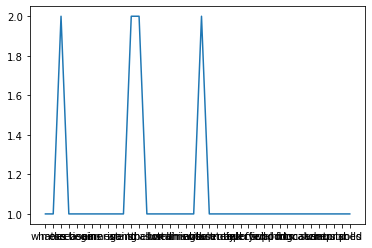

In [40]:
# try and plot out a chart of the dictionary we just created!
import matplotlib
import matplotlib.pyplot as plt

plt.plot(list(frequency.keys()), list(frequency.values()))
plt.show()